<a href="https://colab.research.google.com/github/belan1997/git/blob/master/COLOR_IDENTIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1-Import Libraries**

---



In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

**Step 2- Working with OpenCV**

---



The type of this input is <class 'numpy.ndarray'>
Shape: (2160, 3840, 3)


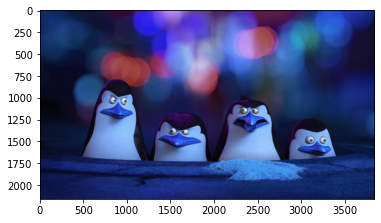

In [47]:
image = cv2.imread('617613.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

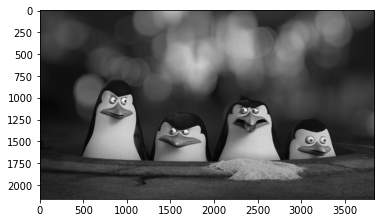

In [48]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

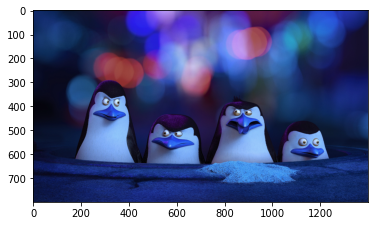

In [49]:
resized_image = cv2.resize(image, (1400, 800))
plt.imshow(resized_image)

**Step 3-COLOR IDENTIFICATION** :
  RGB to Hex Conversion 

---




In [50]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

**Step 4-Read image in RGB color space**

---



In [51]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

**Step 5-Get colors from an image**

---



In [52]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors


[array([104.45054816,  42.3728059 ,  21.99505776]),
 array([163.5137999 ,  98.20699852,  76.37715623]),
 array([211.12309974,  65.81364479,  61.443604  ]),
 array([39.14346059, 14.85061502, 14.0645307 ]),
 array([ 90.18242964,  66.66670116, 143.90987169]),
 array([71.53071228, 28.02446813, 27.14825286]),
 array([214.44484095, 131.78639886,  94.66445759]),
 array([235.59928596, 169.9371529 , 145.71466621]),
 array([134.83564806,  61.94886742,  36.74582372])]

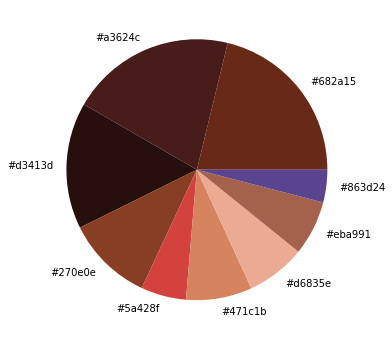

In [54]:
get_colors(get_image('617613.jpg'), 9, True)